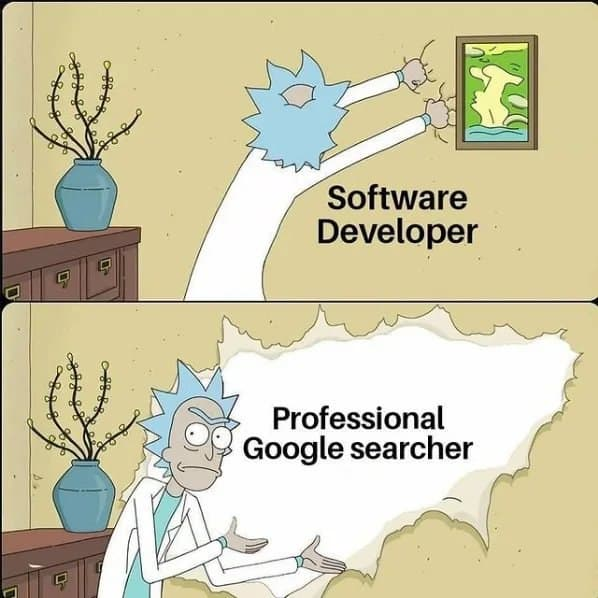

# Упражнение 1: if elif else

Год является високосным, если:
- он делится на 4 и не делится на 100 или
- он делится на 400

Ввод: целое число >= 0

Вывод: `YES` если високосный, иначе `NO`

Пример:

`2020
YES`

In [ ]:
A = int(input())
if A % 4 == 0 and A % 100 != 0 or A % 400 == 0:
    print('YES')
else:
    print('NO')

Выведите максимальное число из 3 заданных (не используйте функцию, это скучно)

Ввод: 3 целых числа

Вывод: максимальное число

Пример:

`1
2
3
3`

Бонусное упражнение

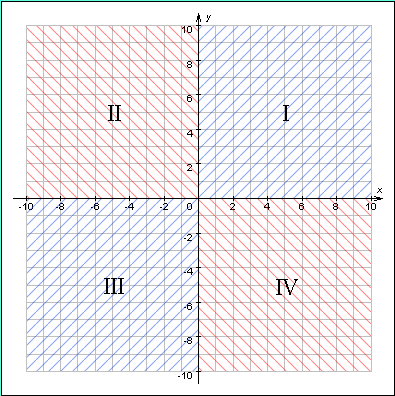

Ввод: 4 ненулевых числа: x1, y1, x2, y2

Вывод: `YES` если они в одной четверти, иначе `NO`

Пример:

`1
-3
2
2
NO`

Подсказка: попробуйте понять, что объединяет точки в одной четверти и как это можно записать

# Упражнение 2: циклы for, while

Сумма последовательности

Ввод: случайные ненулевые целые числа, 0 заканчивает последовательность

Вывод: число, равное сумме последовательности

Пример:

`1
2
3
4
5
6
7
8
9
10
0
55`

Старые добрые числа Фибоначчи. "Нулевое" число 0, первое 1, второе 1, далее 2, 3, 5, 8, 13, 21, ...

Ввод: номер числа Фибоначчи >= 1

Вывод: соответствующее число Фибоначчи

Пример:

`8
21`

Снова делимость. Для каждого числа последовательности выведите ближайшее снизу число, делящееся на 9. Если само число делится на 9, выведите его. Считать последовательность на вводе можно с помощью

`my_list = list(map(int, input().split()))`

и, кстати, `list` здесь не нужен (если знаете почему, то это здорово!)

Ввод: последовательность целых чисел, разделенных пробелами

Вывод: последовательность чисел, каждое из которых на новой строке

Пример:

`1 10 21 28 36 44
0
9
18
27
36
36`

# <center> Настала пора сразиться с реальной задачей

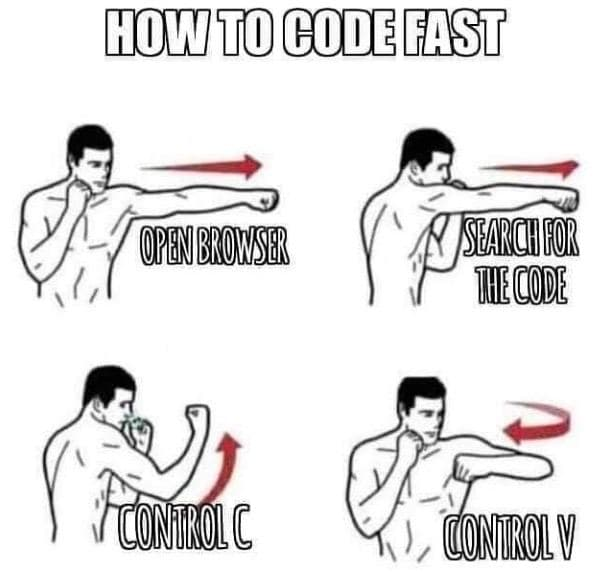

# <center> Основные концепты: Business Question и Business Value </center>
Представьте, что к вам приходит заказчик - decision maker, будь то департамент или отдельный человек,
и дает (если повезет, иногда ведь вообще ничего не дадут), хм, скажем культурно - некрасивые данные,
а потом говорит:

"Дайте какие-нибудь интересные инсайты насчет того, какую энергию нам стоит использовать.
Мы хотим презентовать себя на рынке как экологичную компанию"

Что делать? Как не довести ситуацию до второго главного вопроса: кто виноват?

### Источники данных: [Our World in Data: Energy](https://github.com/owid/energy-data) & [Our World in Data: CO₂ and Greenhouse Gas Emissions](https://github.com/owid/co2-data)
### Описание данных: [Energy](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) & [GHG](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)

### Заметки
https://ourworldindata.org/energy

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
- ископаемое топливо - уголь, нефть и газ (coal, oil, and gas)
- PEC, primary energy consumption - первичное потребление энергии
- GHG, greenhouse gases - парниковые газы

## Импорты и настройка графиков

In [ ]:
# если у вас не установлены эти библиотеки, прогоните эту ячейку
!pip3 install --user --upgrade numpy pandas matplotlib seaborn tqdm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# полезная библиотека для отслеживания прогресса с итераторами
from tqdm import tqdm


# векторные изображения более четко рендерятся
%config InlineBackend.figure_format = 'svg'
# никогда не используйте дефолтный стиль в plt, вы убьете себе глаза
plt.style.use('ggplot')

In [ ]:
# как работает tqdm
for _ in tqdm(range(10000000)):
    _ = 100

## Данные
... ибо нам нужны аргументы для ответа бизнесу

In [ ]:
energy_data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
ghg_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

## EDA - Exploratory Data Analysis
... знай своего друга, своего врага и данные, которые в тебя бросили

Датасеты относительно ежедневных задач большие, давайте поглядим на них. Используйте методы `info(), head(), tail()` и, при необходимости, атрибут `columns`. Кстати, ввиду однородности столбцов с точки зрения naming conventions, есть смысл отсортировать названия столбцов перед выводом, если вдруг решите с ними ознакомиться

- Давайте возьмем данные с 2000 по наст. время: приведем столбцы `year` в обоих датасетах к типу datetime и возьмем данные с 2000 года
- Давайте исследовать глобальные тренды: выберите данные для всего мира
- Есть ли в датасетах первичный ключ? Если да, то почему бы не использовать его вместо бессмысленного номера строки?

Вам помогут: `pd.to_datetime(), df.set_index()`

### EDA для мировых данных
Теперь, когда мы выделили основные массивы, давайте посмотрим на то, что из себя представляют PEC и GHG. Проверьте на пропсуки с помощью метода `isna()` и нужного агрегирующего метода. Видите столбец исключительно с пропусками? С большей частью? Есть ли в нем польза?

Орудие - метод `dropna()`

### Наблюдения
- раз
- два
- три


### Выбор данных
Много колонок => много переменных => много линий / других объектов на картинке => нечитаемые графики => никакой пользы
- Выберем наиболее важные фичи в PEC, которые отражают потребление и долю в PEC
- Аналогично выберем важные столбцы, касающиеся CO₂ and GHG (заметили, что во втором датасете нет столбцов share?)

Подсказка: благодаря авторам датасетов в названиях стоблцов видны подстроки, которые показывают принадлежность к смысловой группе

### Новые фичи
Видно, что в датасете PEC есть столбцы share, показывающие долю от всего PEC. Почему бы не создать такую же красоту в датасете GHG?

In [ ]:
# только для главных столбцов, без per capita, total GHG and % growth
ghg_share_cols = []
for col in ghg.columns[:len(ghg_cols) - 2]:
    share_col = 

# Аллилуйя, графики!

### График 1: World PEC, GHG, and CO₂
Давайте построим агрегаты для всего мира:

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(9, 8))

# world energy consumption
sns.lineplot(x=pec.index,
             y=pec.primary_energy_consumption,
             ax=ax0,
             color='black',
             marker='X',
             label='world PEC')

# world ghg


# world co2


# setting labels and legend
ax0.set_title('GHG Emissions and PEC in the World', x=0.45, y=1.05)
ax0.set_ylabel('energy consumption, TWh')
ax0.legend(loc='upper left')
ax1.set_ylabel('emissions, mln tonnes')
ax1.legend(loc='upper left')

# fig.savefig('graph_1.png', dpi=600)
plt.show()

### Наблюдения
- мысль 1
- мысль 2
- мысль 3

### График 2: World PEC by Source
Посмотрим на распределение потребления энергии в разбивке на источники:

In [ ]:
# по аналогии с предыдущим заданием настройте график

# только долевые столбцы
sns.lineplot(data=pec[pec_share_cols],
             palette='Paired',
             marker='o',
             dashes=None)

# не забудьте лейблы

# plt.savefig('graph_2.png', dpi=600)


Есть ли лучшие варианты показать распределение долей? Какие типы графиков подходят для этого?

### Наблюдения
- раз
- два
- три

### Graph 3: World GHG Emissions by Source
It should be noted that there is no data as to total GHG emissions in 2017-2020. Still, let us look at the distribution of GHG emissions by source:

In [ ]:
# only share columns
sns.lineplot(data=ghg[ghg_share_cols],
             palette='Paired',
             marker='v',
             dashes=None)
plt.title('Distribution of GHG Emissions in the World by Source')
plt.ylabel('share of GHG, %')

plt.show()

### Observations
- Firstly, one can see that the CO₂ emissions from coal production's share of GHG emissions by the end of 2000s had taken the lead at about 30% and fluctuated slightly around that level
- Secondly, that of oil production experienced a gradual decrease in 2000-2011, losing its first place to that of coal, then leveled off in 2011-2015 and increased a little in 2016
- Thirdly, while methane's and N₂O's shares were moderately falling throughout the period, those of gas flaring, gas, and cement production's CO₂ did not show any significant changes at all

### Graph 4: Changes in World PEC Sources and CO₂
Let us observe how did the consumption of energy and CO₂ emissions change over the period:

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(x=ghg.index,
             y=ghg.co2_growth_prct,
             ax=ax,
             color='black',
             label='co2_growth_prct')

sns.lineplot(data=pec[pec_change_cols],
             palette='Paired',
             dashes=None,
             ax=ax)

ax.set_title('PEC and CO2 Changes in the World by Source')
ax.set_ylabel('change, %')

plt.show()

### Observations
- The most volatile seems to be solar energy consumption
- Energy from biofuel consumption takes the second place in volatility
- Energy consumption changes less than almost every component of it
- CO₂ emissions are not very volatile in comparison to other features
- Vast majority of changes in energy sources never dropped below -5% in the 21<sup>st</sup> century; they usually grow with a positive rate

### Graph 5: World PEC per Capita by Source
Let us visualize per capita primary energy consumption in the world:

In [ ]:
sns.lineplot(data=pec[pec_per_capita_cols],
             palette='Paired',
             marker='>',
             dashes=None)
plt.title('World PEC Per Capita by Source')
plt.ylabel('energy consumption, TWh')

plt.show()

### Observations
As we can see, all sources' PEC per capita were stable, but some points can be made:
- The decline in 2007-2008 and significant slump in 2009 are more observable than in overall dynamics (ref. to the whole project)
- Low carbon, gas, and renewables PEC per capita show the most significant rise, but even they are not very volatile
- Growth of PEC per capita slowed down since 2007: in 2010s the dynamics are more stable then those of 2000s
- Again, referring to the whole project, we can safely assume that the difference between the slopes of PEC per capita and PEC can be explained by the population growth
- The dynamics of PEC per capita and fossil PEC per capita are incredibly similar, only in 2018-2019 they slighly diverge
- Judging by the current situation with COVID-19 and the global economic and financial crisis in 2007-2009, we can expect at least decline in growth of PEC per capita, if not a significant decrease

### Graph 6: GHG Emissions Per Capita
Previously there was a problem with CO₂ per capita, as the initial column `co2_per_capita` was measured in million tonnes per person, which resulted in all zeros. How we dealt with this problem:

In [ ]:
ghg.co2_per_capita, wrld_ghg.co2 / wrld_ghg.population

In [ ]:
ghg.loc[:, 'co2_per_capita'] = wrld_ghg.co2 / wrld_ghg.population * 1e6

In [ ]:
ghg.co2_per_capita

In [ ]:
# though on the graph it may seem so, there wasn't and still isn't any similar problem with CO2
# from flaring, it is just that the flaring_co2 itself is low
ghg.flaring_co2_per_capita, (wrld_ghg.flaring_co2 / wrld_ghg.population * 1e6).round(3)

Now that we have corrected the mistakes, let us study GHG emissions per capita in the world:

In [ ]:
sns.lineplot(data=ghg[ghg_per_capita_cols],
             palette='Paired',
             marker='o',
             dashes=None)
plt.title('World GHG Emissions Per Capita')
plt.ylabel('emissions, tonnes')

plt.show()

### Observations
Even though a lot of data for 2016-2020 is missing, we can still make some conclusions:
- The dynamics of all sources' emissions per capita are stable, but there are some exceptions
- A slight increase can be seen in gas CO₂ emissions per capita in 2016-2018
- The most volatile is coal CO₂ emissions per capita, showing a significant rise between 2000 and 2011 with the slump in 2009 and a following decline in 2011-2018
- Again, as in the previous graph, the aggregate features show very similar dynamics, in this case GHG and CO₂ emissions per capita
- A more or less optimistic conclusion can be made based on aggregate features in 2012-2018; it can be seen that emissions per capita are not rising, sometimes levelling off or decreasing, which proves that the overall growth of GHG emissions can be explained by the population growth

### Graph 7: Correlation Matrix between PEC and GHG Emissions
In order to plot correlation between PEC and GHG emissions in the world, we took the following steps:
1. Stacked the matrices horizontally with the corresponding keys
2. Computed correlation
3. Selected correlation between the columns of two matrices

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(
    pd.concat(
        [pec, ghg],
        axis=1,
        keys=['pec', 'ghg']).corr().loc['pec', 'ghg'],
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f',
    cmap='vlag',
    ax=ax
)
plt.title('Correlation between PEC and GHG Emissions in the World', x=0.45)

plt.show()

## Observations
While this matrix can be studied for hours, let us select a few interesting points:
- There are **a lot** of very saturated red cells in it, which means there is a high correlation between PEC and GHG emissions
- A lot of blue cells are present in nuclear consumption, nuclear share and nuclear energy per capita rows, because it is one of the most environmentally-friendly source of energy
- We should be careful to interpret blue cells in oil share row; knowing that it is a fossil fuel and referring to the whole project (share dynamics), we can say that negative correlation is caused by its decreasing share, while GHG emissions continues to grow. It does not in any way mean that oil is an ecologically justified source of energy
- 0.99 correlation between PEC and GHG emissions leaves no-one in doubt that the qualitative reasearches on this topic are supported by real data; energy consumption positively and almost linearly affects GHG emissions
- Relatively lower correlation can be seen between wind or solar consumption and different GHG sources
- Ecological sources of energy correlate with GHG sources, but it does not mean cause-effect relationship, it just means they are moving in the same direction
- The weakest correlation in general can be observed in rows of the matrix corresponding to the % changes in PEC
- Despite the previous statement, % changes in energy, coal and fossil fuels consumption strongly correlate with % changes in CO₂ emissions
- There are a lot of negative correlation coefficients in methane, N₂O and oil CO₂ columns, representing to per capita production and share in GHG emissions; this means that their dynamics differ from the global trend - steady growth

## Conclusions
Following the well-known principle 'correlation does not mean causation' we do not base our results on the data only, we use qualitative facts as well:
1. Considering the PEC and GHG emissions at the time of global economic and financial crisis of 2007-2009 and the current situation with COVID-19, isolation, decline in airservice, shutdown of many firms, and other recent developments in the world, we predict a slump in GHG emissions in 2020 with a probable continuation in 2021 in the absence of a reliable vaccine.
2. The cause-effect relationship of the energy consumption and GHG emissions with the qualitative support is well-proven in this project.
3. The correlation between some features does not represent the actual causation between them, which is why we should not always believe what we read in the news and think for ourselves.
4. A growing trend in PEC and GHG emissions does not represent per capita trends; therefore, the former is affected by world population growth.
5. While fossil fuels are still the primary source of PEC, more environment-friendly sources' shares have been steadily rising in recent years. We can only hope that this trend will follow in the years to come and maybe one day we can live in the world, where the renewable energy is the only energy.